## <center>Pandas

In Pandas there are two type of data structure.
<br>
1. Series: Is it 1-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, e.t.c.) <br>It comes along with the index which is also called as axis. <br>Series contains homogenous data, meaning all the data inside the series 1-d array would be of same type.

2. DataFrame: It is a collection of one or more series objects. <br> So dataframe can be heterogenous in nature, as different series could comprise of different dtype.

In [1]:
#importing pandas
import pandas as pd

In [2]:
#Uploading a file
from google.colab import files
files.upload()

Saving pokemon_data.csv to pokemon_data.csv


{'pokemon_data.csv': b"#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary\r\n1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,FALSE\r\n2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,FALSE\r\n3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,FALSE\r\n3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,FALSE\r\n4,Charmander,Fire,,39,52,43,60,50,65,1,FALSE\r\n5,Charmeleon,Fire,,58,64,58,80,65,80,1,FALSE\r\n6,Charizard,Fire,Flying,78,84,78,109,85,100,1,FALSE\r\n6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,FALSE\r\n6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,FALSE\r\n7,Squirtle,Water,,44,48,65,50,64,43,1,FALSE\r\n8,Wartortle,Water,,59,63,80,65,80,58,1,FALSE\r\n9,Blastoise,Water,,79,83,100,85,105,78,1,FALSE\r\n9,BlastoiseMega Blastoise,Water,,79,103,120,135,115,78,1,FALSE\r\n10,Caterpie,Bug,,45,30,35,20,20,45,1,FALSE\r\n11,Metapod,Bug,,50,20,55,25,25,30,1,FALSE\r\n12,Butterfree,Bug,Flying,60,45,50,90,80,70,1,FALSE\r\n13,Weedl

#Initialization

In [3]:
#Series initialization
a = pd.Series([1, 2, 3.0])
a

0    1.0
1    2.0
2    3.0
dtype: float64

Dataframe can be initialized from 
<br> a) lists 
<br> b) Dictionaries


In [4]:
print('Data passed as list')
df_list = pd.DataFrame([['May1',32],['May2',35],['May3',40],['May4',50]])
print(df_list)

Data passed as list
      0   1
0  May1  32
1  May2  35
2  May3  40
3  May4  50


In [5]:
print('Data passed as dictionary')
df_dict = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]},dtype = float)
print(df_dict)

Data passed as dictionary
     A    B
0  1.0  4.0
1  2.0  5.0
2  3.0  6.0


#Column and Indexes
In case of dictionary the keys would act as columns but in lists, the column names if not specified will start as '0'-1st column, '1'-2nd Column and so on. <br> The left most part of the dataframe is called as index, it's starts default with index 0

In [6]:
#Listing the columns
print(df_dict.columns)

Index(['A', 'B'], dtype='object')


In [7]:
#rename columns
df_dict.rename(columns={'A':'a'}) 
# inplace by default is false
# if inplace = True is not set then the changes are not made on the original df but only a temp df is made with changes
df_dict

,A,B
0,1.0,4.0
1,2.0,5.0
2,3.0,6.0


In [8]:
# changes made for original df
df_dict.rename(columns={'A':'c'},inplace=True)
df_dict

,c,B
0,1.0,4.0
1,2.0,5.0
2,3.0,6.0


In [9]:
# Reset column names
# Tip: remeber to pass the entire list in this case
df_dict.columns = ['a','b']
df_dict.head()

,a,b
0,1.0,4.0
1,2.0,5.0
2,3.0,6.0


In [10]:
#defining columns, index during dataframe creation
df_temp = pd.DataFrame([['May1',32],['May2',35],['May3',40],['May4',50]],index = ['Day1','Day2','Day3','Day4'],columns = ['May','Temperature'])
df_temp

,May,Temperature
Day1,May1,32
Day2,May2,35
Day3,May3,40
Day4,May4,50


reset_index: To drop index and bring pandas default sequential form of 0,1...

In [11]:
df_temp.reset_index(drop=True,inplace=False)
# Here drop=True means we want to drop the original index we have and reset to default value

,May,Temperature
0,May1,32
1,May2,35
2,May3,40
3,May4,50


In [12]:
#We can also make a column as index
df_temp = pd.DataFrame([['May1',32],['May2',35],['May3',40],['May4',50]],columns = ['May','Temperature'])
df_temp.set_index('May')

,Temperature
May,
May1,32
May2,35
May3,40
May4,50


Q. What are the columns/index of df_temp after the above code is executed?

In [13]:
# Reading data from a csv file
#index_col describes which column we want to set as the index
#head function is used to print first n rows of the dataframe, here n=10 in our case
pokemon_data = pd.read_csv('pokemon_data.csv',index_col = 0)
pokemon_data.head(5)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Q. In the above pokemon data, index does not start from 0, reset the index for it inplace.

In [ ]:
#Ans

# Basic Data Statistics

In [14]:
#describe function will compute basic statistics as shown below as for each column
pokemon_data.describe()
#Note: Stats are not calculated for object or string dtype

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [15]:
#Check the type of each column it will be Series datatype
print(pokemon_data.dtypes)

Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


***value_counts***

calculate occurences in a column

return type is series object with index as category and counts as column

In [16]:
pokemon_data['Type 2'].value_counts()
#pokemon_data['Type 2'].value_counts().reset_index().rename(columns={'index':'Type 2','Type 2':'Counts'})

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Rock        14
Ice         14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [17]:
print(pokemon_data['HP'].mean())
print(pokemon_data['HP'].max())
print(pokemon_data['HP'].min())
print(pokemon_data['HP'].std())
print(pokemon_data['HP'].sum())

69.25875
255
1
25.534669032332047
55407


Q. What if I want to do some calculation for each row instead of column?
#Axis

axis denotes the dimension of dataframe. <br>
axis = 0, also the axis of index/rows. Thus calculations are done at column level. <br>
axis = 1, also axis of columns. Calculations are done for each row <br>
For added clarity, you can specify axis='index' (instead of axis=0) or axis='columns' (instead of axis=1).



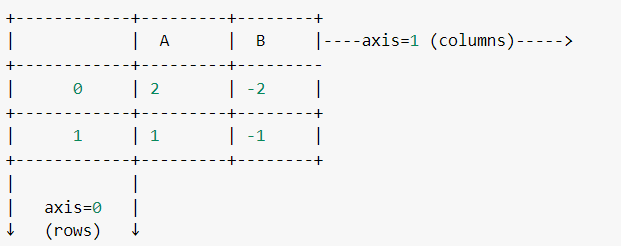


In [18]:
df_dummy = pd.DataFrame([[2,-2],[1,-1]])
df_dummy

,0,1
0,2,-2
1,1,-1


In [19]:
#summation on axis 0 or for each column
df_dummy.sum(axis=0)

0    3
1   -3
dtype: int64

In [20]:
#summation on axis 1 or for each column
df_dummy.sum(axis=1)

0    0
1    0
dtype: int64

#NaN 

NaN (Not a number)- It is a special floating point number (like inifinity) and is an indication of no data.


In [21]:
#NaN 
df_nan = pd.DataFrame([{'a': 1, 'b': 2},{'a': 5, 'b': 10,'c':20}])
print(df_nan)
#Notice column c is of type float due to NaN

   a   b     c
0  1   2   NaN
1  5  10  20.0


Isnull function: Used to check existence of NaN/ Null values.


In [22]:
print(df_nan.isnull())
#isnull working -- assigns each data point in the dataframe with True or False
#return dataframe filled with True or False 

       a      b      c
0  False  False   True
1  False  False  False


In [23]:
#To count how many NaN, use sum function on the result of isnull
print(df_nan.isnull().sum())

a    0
b    0
c    1
dtype: int64


Q. Which columns in pokemon data have null values

In [24]:
#Ans

#Data Manipulation

In [25]:
df = pd.DataFrame([['May1',32],['May2',35],['May3',40],['May4',50]],index = ['Day1','Day2','Day3','Day4'],columns = ['May','Temperature'])

Accessing Values

In [26]:
#Access column by name
print(df['Temperature'])

Day1    32
Day2    35
Day3    40
Day4    50
Name: Temperature, dtype: int64


In [27]:
#Multiple column access
df[['Temperature','May']]

,Temperature,May
Day1,32,May1
Day2,35,May2
Day3,40,May3
Day4,50,May4


![alt text](https://i.pinimg.com/474x/1d/9c/4f/1d9c4f968514e734196ab19db2e5f281.jpg)

In [28]:
print(type(df.iloc[1]))
print(df.iloc[1])

<class 'pandas.core.series.Series'>
May            May2
Temperature      35
Name: Day2, dtype: object


In [29]:
print('range of index wise selection in discrete manner')
print(df.iloc[[1,2,3]])

range of index wise selection in discrete manner
       May  Temperature
Day2  May2           35
Day3  May3           40
Day4  May4           50


In [30]:
print('Get single value')
print(df.iloc[0,0])

Get single value
May1


In [32]:
print('Complete row wise and partial column wise')
print(df.iloc[:,1])

Complete row wise and partial column wise
Day1    32
Day2    35
Day3    40
Day4    50
Name: Temperature, dtype: int64


Q. Select first 5 columns of pokemon dataset

In [ ]:
#Ans

In [33]:
#Adding columns
#Notice the difference
add_column = pd.Series(['95 street','barclays ave','jay street','newport'],index=['Day1','Day3','Day2','Day4'])
df['Stations'] = add_column
df['Stations2'] = pd.Series(['95 street','barclays ave','jay street','newport'])
print(df)
#either specify index or add as python list instead of series
df['Stations2'] = ['95 street','barclays ave','jay street','newport']
print(df)

       May  Temperature      Stations Stations2
Day1  May1           32     95 street       NaN
Day2  May2           35    jay street       NaN
Day3  May3           40  barclays ave       NaN
Day4  May4           50       newport       NaN
       May  Temperature      Stations     Stations2
Day1  May1           32     95 street     95 street
Day2  May2           35    jay street  barclays ave
Day3  May3           40  barclays ave    jay street
Day4  May4           50       newport       newport


In [34]:
#New column using existing column
df['Wind Speed'] = df['Temperature']*0.414
print(df)

       May  Temperature      Stations     Stations2  Wind Speed
Day1  May1           32     95 street     95 street      13.248
Day2  May2           35    jay street  barclays ave      14.490
Day3  May3           40  barclays ave    jay street      16.560
Day4  May4           50       newport       newport      20.700


In [35]:
#Coulmn addition (with same data type)
df['Add_Temp_Wind'] = df['Temperature'] + df['Wind Speed']
print(df)

       May  Temperature      Stations     Stations2  Wind Speed  Add_Temp_Wind
Day1  May1           32     95 street     95 street      13.248         45.248
Day2  May2           35    jay street  barclays ave      14.490         49.490
Day3  May3           40  barclays ave    jay street      16.560         56.560
Day4  May4           50       newport       newport      20.700         70.700


In [36]:
#Cahnging values using loc/iloc
df.iloc[0,0] = 'May11'
print(df)

        May  Temperature      Stations     Stations2  Wind Speed  Add_Temp_Wind
Day1  May11           32     95 street     95 street      13.248         45.248
Day2   May2           35    jay street  barclays ave      14.490         49.490
Day3   May3           40  barclays ave    jay street      16.560         56.560
Day4   May4           50       newport       newport      20.700         70.700


In [37]:
#Changing entire row/column using iloc/loc
df.iloc[0] = ['May1',35,'86 street','95 Street',12,44]
print(df)

       May  Temperature      Stations     Stations2  Wind Speed  Add_Temp_Wind
Day1  May1           35     86 street     95 Street       12.00          44.00
Day2  May2           35    jay street  barclays ave       14.49          49.49
Day3  May3           40  barclays ave    jay street       16.56          56.56
Day4  May4           50       newport       newport       20.70          70.70


Column deletion

In [38]:
#drop function
#can be used to drop based on column or index 
df['Add_Temp_Wind'] = df['Temperature'] + df['Wind Speed']
print(df)
df.drop('Add_Temp_Wind',axis=1,inplace=True)
print(df)

       May  Temperature      Stations     Stations2  Wind Speed  Add_Temp_Wind
Day1  May1           35     86 street     95 Street       12.00          47.00
Day2  May2           35    jay street  barclays ave       14.49          49.49
Day3  May3           40  barclays ave    jay street       16.56          56.56
Day4  May4           50       newport       newport       20.70          70.70
       May  Temperature      Stations     Stations2  Wind Speed
Day1  May1           35     86 street     95 Street       12.00
Day2  May2           35    jay street  barclays ave       14.49
Day3  May3           40  barclays ave    jay street       16.56
Day4  May4           50       newport       newport       20.70


In [39]:
#Drop row of a dataframe
#use drop function and pass the indexed index or name of that index
df.drop(df.index[0])  #inplace=False

,May,Temperature,Stations,Stations2,Wind Speed
Day2,May2,35,jay street,barclays ave,14.49
Day3,May3,40,barclays ave,jay street,16.56
Day4,May4,50,newport,newport,20.70


In [40]:
#By index name
df.drop('Day2',axis=0)

,May,Temperature,Stations,Stations2,Wind Speed
Day1,May1,35,86 street,95 Street,12.00
Day3,May3,40,barclays ave,jay street,16.56
Day4,May4,50,newport,newport,20.70


Q. Select data for Temperature and wind speed column by using loc method

In [41]:
#Ans

Condition based filtering

In [42]:
#Syntax ----- data.loc['Condition(s)']
#Coditions generate a mask df of booleans which is used to select relevant rows from original dataframe
df['Temperature'] > 40

Day1    False
Day2    False
Day3    False
Day4     True
Name: Temperature, dtype: bool

In [43]:
#Selection part
df[df['Temperature'] > 40]

,May,Temperature,Stations,Stations2,Wind Speed
Day4,May4,50,newport,newport,20.7


In [44]:
#Complex selection
df[(df['Temperature'] > 30) & (df['Wind Speed']<20)]

,May,Temperature,Stations,Stations2,Wind Speed
Day1,May1,35,86 street,95 Street,12.00
Day2,May2,35,jay street,barclays ave,14.49
Day3,May3,40,barclays ave,jay street,16.56


Q. What is the count of pokemon that have null in type 2?

In [45]:
#Ans

In [46]:
#Getting unique values for column 'Type 1' with help of unique function
#The return type is ndarray which consist of n rows an d columns 
#(18,) - Represents 18 rows and 1 column 
print(pokemon_data['Type 1'].unique())
print(type(pokemon_data['Type 1'].unique()))
print(pokemon_data['Type 1'].unique().shape)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
<class 'numpy.ndarray'>
(18,)


#Data Cleanup

dropna

In [47]:
#removing null containing rows
pokemon_data.dropna()
#since inplace is not set, values/rows will not be removed

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


using masking

In [50]:
#Masking and use of loc
#Converting to string datatype with astype
pokemon_data['Type 2'] = pokemon_data['Type 2'].astype(str)
mask = (pokemon_data['Type 2'] != 'nan')
pk_data = pokemon_data.loc[mask]
pk_data

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


Q. select pokemons that have (type 1 grass and type 2 as steel) or have speed >10

In [ ]:
#Ans
#and is & , or is | 

#Sort

In [51]:
#Can assign one or more column for sorting
#Return type is dataframe object

pokemon_data.sort_values(by=['HP','Attack','Defense','Speed'],ascending = [False,True,False,True],inplace=True)
pokemon_data.head(5)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
242,Blissey,Normal,nan,255,10,10,75,135,55,2,False
113,Chansey,Normal,nan,250,5,5,35,105,50,1,False
202,Wobbuffet,Psychic,nan,190,33,58,33,58,33,2,False
321,Wailord,Water,nan,170,90,45,90,45,60,3,False
594,Alomomola,Water,nan,165,75,80,40,45,65,5,False


#Groupby

used to perform some aggregate analysis based on values in some column

In [52]:
#Normal Group by
pokemon_data.groupby('Type 1').head(1)
#The above code displays the top row within each group.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
242,Blissey,Normal,nan,255,10,10,75,135,55,2,False
202,Wobbuffet,Psychic,nan,190,33,58,33,58,33,2,False
321,Wailord,Water,nan,170,90,45,90,45,60,3,False
426,Drifblim,Ghost,Flying,150,80,44,90,54,80,4,False
297,Hariyama,Fighting,nan,144,120,60,40,60,50,3,False
716,Xerneas,Fairy,nan,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
646,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True
699,Aurorus,Rock,Ice,123,77,72,99,92,58,6,False


In [53]:
#Aggregate Functions on groups
pokemon_data.groupby('Type 1').mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [54]:
#groupby with more than 1 column
#order in which columns are specified is important
pokemon_data.groupby(['Type 2','Type 1']).mean()

HP      Attack  ...  Generation  Legendary
Type 2 Type 1                           ...                       
Bug    Poison    40.000000   50.000000  ...    4.000000   0.000000
       Rock      60.000000  110.000000  ...    3.000000   0.000000
Dark   Fighting  95.000000  124.000000  ...    6.000000   0.000000
       Ghost     50.000000   92.000000  ...    4.000000   0.000000
       Grass     76.666667   95.000000  ...    3.000000   0.000000
...                    ...         ...  ...         ...        ...
nan    Poison    66.000000   72.266667  ...    1.933333   0.000000
       Psychic   72.552632   64.947368  ...    3.342105   0.236842
       Rock      67.111111  103.333333  ...    3.888889   0.111111
       Steel     62.000000   90.000000  ...    4.200000   0.200000
       Water     66.847458   71.830508  ...    2.864407   0.050847

[154 rows x 8 columns]

#Apply 

It can also be used to transform data

We use apply to manipulate/ create new data from existing info

syntax: df.apply('transformation code')



In [55]:
data = pd.DataFrame({
    'age' :     [ 10, 22, 34, 36, 48, 25, 61],
    'gender' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F']
})
def category(age):
    if(0 < age <= 16):
        return 'child'
    elif(16 < age <= 22):
        return 'Teenager'
    elif(22 < age <= 50):
        return 'Adult'
    else:
        return 'Senior'  
        
data['category'] = data['age'].apply(category)

data.head(8)

,age,gender,category
0,10,M,child
1,22,F,Teenager
2,34,F,Adult
3,36,M,Adult
4,48,M,Adult
5,25,M,Adult
6,61,F,Senior


#Interesting Facts
copy


In [194]:
#copy function will copy entire data to another variable and if we make some changes in pokemon_data, those changes will be not reflected in another assigned variable

diff_df = pokemon_data.copy()

#Try out some manipuation and check results for both dataframes
same_df = pokemon_data
same_df.drop('Type 1',axis=1,inplace=True)
print(same_df.columns)
print(diff_df.columns)

Index(['Name', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'hp'],
      dtype='object')
Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'hp'],
      dtype='object')


Q. As a data scientist you are asked to get the details of strongest pokemon for each category in type 2.
Criteria for strongest is HP, in case of clash it should be resolved by Attack then Defense and speed.


In [ ]:
#Ans

#Assignment
Amazon Transaction Data 